# Proyek Analisis Data: [Bikes Sharing dataset]
- **Nama:** = Septiadi Bayu Eka Samudera Istiyono
- **Email:** = Bayu21.mail@gmail.com
- **ID Dicoding:** = Septbyu

## Menentukan Pertanyaan Bisnis

1. Bagaimana faktor-faktor lingkungan (suhu, kelembaban, kecepatan angin) dan temporal (musim, jam, hari) memengaruhi pola penyewaan sepeda harian dan per jam?

2. Bagaimana pengaruh cuaca terhadap penggunaan sepeda oleh pengguna terdaftar (registered) dan pengguna kasual (casual)?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from google.colab import drive
from scipy import stats

drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [2]:
data_dir = "/content/drive/MyDrive/Bike Dataset"
day_df= pd.read_csv(data_dir + "/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv(data_dir + "/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
1. Jumlah total baris dan kolom: Dataset memiliki 17,379 baris dan beberapa kolom dengan informasi terkait penyewaan sepeda.
2. Jenis variabel: Ada variabel kategorikal seperti season, holiday, workingday, dan variabel numerik seperti temp, windspeed, cnt (jumlah penyewaan sepeda), serta informasi pengguna kasual dan terdaftar (casual, registered).


### Assessing Data

Dataset Day

In [4]:
# mengecek "missing value" dari day dataset
print("\nMissing values in 'day' dataset:")
display(day_df.isnull().sum())

# mengecek duplikasi dari day dataset
print("\nDuplicate rows in 'day' dataset:")
display(day_df.duplicated().sum())

# deskripsi statistik untuk 'day'
print("\nDescriptive statistics for 'day' dataset:")
display(day_df.describe(include="all"))


Missing values in 'day' dataset:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0



Duplicate rows in 'day' dataset:


np.int64(0)


Descriptive statistics for 'day' dataset:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dataset Hour

In [5]:
# mengecek "missing value" dari hour dataset
print("\nMissing values in 'hour' dataset:")
display(hour_df.isnull().sum())

# mengecek duplikasi dari hour dataset
print("\nDuplicate rows in 'hour' dataset:")
display(hour_df.duplicated().sum())

# deskripsi statistik untuk 'day'
print("\nDescriptive statistics for 'hour' dataset:")
display(hour_df.describe(include="all"))


Missing values in 'hour' dataset:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0



Duplicate rows in 'hour' dataset:


np.int64(0)


Descriptive statistics for 'hour' dataset:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
1. Kedua dataset (day_df dan hour_df) tidak memiliki nilai yang hilang (missing values) atau baris duplikat. Hal ini menunjukkan bahwa data yang ada sudah bersih dan dapat digunakan untuk analisis lebih lanjut tanpa perlu pembersihan data tambahan.

2. Data ini memungkinkan analisis lebih lanjut untuk melihat pengaruh cuaca (seperti suhu dan kelembaban) serta waktu (baik dalam setahun maupun sepanjang hari) terhadap pola penyewaan sepeda.

3. Kolom cnt (jumlah penyewaan sepeda) memiliki rentang yang luas, menunjukkan fluktuasi tinggi dalam penyewaan sepeda di waktu yang berbeda.

4. Data ini mencakup musim yang berbeda, yang memungkinkan untuk mengeksplorasi pola musiman dalam penyewaan sepeda. Misalnya, penyewaan sepeda kemungkinan akan lebih tinggi pada musim panas dibandingkan dengan musim dingin.

### Cleaning Data

In [6]:
# konversi 'dteday' ke datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [7]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Mapping nama bulan pada Day dataset

In [8]:
# Memetakan angka bulan ke nama bulan
mnth_name= {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
day_df['mnth_name'] = day_df['mnth'].map(mnth_name)
# Menampilkan beberapa data untuk memverifikasi perubahan
print(day_df[['dteday', 'mnth', 'mnth_name']])

        dteday  mnth mnth_name
0   2011-01-01     1   January
1   2011-01-02     1   January
2   2011-01-03     1   January
3   2011-01-04     1   January
4   2011-01-05     1   January
..         ...   ...       ...
726 2012-12-27    12  December
727 2012-12-28    12  December
728 2012-12-29    12  December
729 2012-12-30    12  December
730 2012-12-31    12  December

[731 rows x 3 columns]


Mapping nama bulan pada Hour dataset

In [9]:
# Memetakan angka bulan ke nama bulan
mnth_name= {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
hour_df['mnth_name'] = hour_df['mnth'].map(mnth_name)
# Menampilkan beberapa data untuk memverifikasi perubahan
print(hour_df[['dteday', 'mnth', 'mnth_name']])

          dteday  mnth mnth_name
0     2011-01-01     1   January
1     2011-01-01     1   January
2     2011-01-01     1   January
3     2011-01-01     1   January
4     2011-01-01     1   January
...          ...   ...       ...
17374 2012-12-31    12  December
17375 2012-12-31    12  December
17376 2012-12-31    12  December
17377 2012-12-31    12  December
17378 2012-12-31    12  December

[17379 rows x 3 columns]


Mapping Musim dan cuaca pada Day Dataset

In [10]:
# Mapping musim (1-4)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'  # Desember, Januari, Februari
    elif month in [3, 4, 5]:
        return 'Spring'  # Maret, April, Mei
    elif month in [6, 7, 8]:
        return 'Summer'  # Juni, Juli, Agustus
    else:
        return 'Fall'    # September, Oktober, November


# Menampilkan data untuk bulan Januari
january_data = day_df[day_df['dteday'].dt.month == 1]
january_data['season_name'] = january_data['mnth'].apply(get_season)
print("Data untuk Bulan Januari:")
print(january_data[['dteday', 'season', 'season_name']])

# Menampilkan data untuk bulan Oktober
october_data = day_df[day_df['dteday'].dt.month == 10]
october_data['season_name'] = october_data['mnth'].apply(get_season)
print("\nData untuk Bulan Oktober:")
print(october_data[['dteday', 'season', 'season_name']])

Data untuk Bulan Januari:
        dteday  season season_name
0   2011-01-01       1      Winter
1   2011-01-02       1      Winter
2   2011-01-03       1      Winter
3   2011-01-04       1      Winter
4   2011-01-05       1      Winter
..         ...     ...         ...
391 2012-01-27       1      Winter
392 2012-01-28       1      Winter
393 2012-01-29       1      Winter
394 2012-01-30       1      Winter
395 2012-01-31       1      Winter

[62 rows x 3 columns]

Data untuk Bulan Oktober:
        dteday  season season_name
273 2011-10-01       4        Fall
274 2011-10-02       4        Fall
275 2011-10-03       4        Fall
276 2011-10-04       4        Fall
277 2011-10-05       4        Fall
..         ...     ...         ...
665 2012-10-27       4        Fall
666 2012-10-28       4        Fall
667 2012-10-29       4        Fall
668 2012-10-30       4        Fall
669 2012-10-31       4        Fall

[62 rows x 3 columns]


<ipython-input-10-5c216c5e107c>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_data['season_name'] = january_data['mnth'].apply(get_season)
<ipython-input-10-5c216c5e107c>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_data['season_name'] = october_data['mnth'].apply(get_season)


In [11]:
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow/Thunderstorm',
    4: 'Heavy Rain/Snow/Fog'
}

# Apply ke dataset day dan hour
day_df['weather_desc'] = day_df['weathersit'].map(weather_map)

# Contoh hasil
print("Dataset Day - Contoh Deskripsi Cuaca:")
print(day_df[['dteday', 'weathersit', 'weather_desc']])

Dataset Day - Contoh Deskripsi Cuaca:
        dteday  weathersit         weather_desc
0   2011-01-01           2          Mist/Cloudy
1   2011-01-02           2          Mist/Cloudy
2   2011-01-03           1  Clear/Partly Cloudy
3   2011-01-04           1  Clear/Partly Cloudy
4   2011-01-05           1  Clear/Partly Cloudy
..         ...         ...                  ...
726 2012-12-27           2          Mist/Cloudy
727 2012-12-28           2          Mist/Cloudy
728 2012-12-29           2          Mist/Cloudy
729 2012-12-30           1  Clear/Partly Cloudy
730 2012-12-31           2          Mist/Cloudy

[731 rows x 3 columns]


Mapping Musim dan cuaca pada Hour Dataset

In [12]:
# Mapping musim (1-4)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'  # Desember, Januari, Februari
    elif month in [3, 4, 5]:
        return 'Spring'  # Maret, April, Mei
    elif month in [6, 7, 8]:
        return 'Summer'  # Juni, Juli, Agustus
    else:
        return 'Fall'    # September, Oktober, November


# Menampilkan data untuk bulan Februari
february_data = hour_df[hour_df['dteday'].dt.month == 2]
february_data['season'] = february_data['dteday'].dt.month.apply(get_season)
print("Data untuk Bulan Februari:")
print(february_data[['dteday', 'season']])

# Menampilkan data untuk bulan Agustus
august_data = hour_df[hour_df['dteday'].dt.month == 8]
august_data['season'] = august_data['dteday'].dt.month.apply(get_season)
print("\nData untuk Bulan Agustus:")
print(august_data[['dteday', 'season']])

Data untuk Bulan Februari:
          dteday  season
688   2011-02-01  Winter
689   2011-02-01  Winter
690   2011-02-01  Winter
691   2011-02-01  Winter
692   2011-02-01  Winter
...          ...     ...
10073 2012-02-29  Winter
10074 2012-02-29  Winter
10075 2012-02-29  Winter
10076 2012-02-29  Winter
10077 2012-02-29  Winter

[1341 rows x 2 columns]

Data untuk Bulan Agustus:
          dteday  season
4994  2011-08-01  Summer
4995  2011-08-01  Summer
4996  2011-08-01  Summer
4997  2011-08-01  Summer
4998  2011-08-01  Summer
...          ...     ...
14486 2012-08-31  Summer
14487 2012-08-31  Summer
14488 2012-08-31  Summer
14489 2012-08-31  Summer
14490 2012-08-31  Summer

[1475 rows x 2 columns]


<ipython-input-12-a24929d252a6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  february_data['season'] = february_data['dteday'].dt.month.apply(get_season)
<ipython-input-12-a24929d252a6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  august_data['season'] = august_data['dteday'].dt.month.apply(get_season)


In [13]:
weather_map = {
    1: 'Clear/Partly Cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Rain/Snow/Thunderstorm',
    4: 'Heavy Rain/Snow/Fog'
}

# Apply ke dataset day dan hour
hour_df['weather_desc'] = hour_df['weathersit'].map(weather_map)

# Contoh hasil
print("Dataset Hour - Contoh Deskripsi Cuaca:")
print(hour_df[['dteday', 'weathersit', 'weather_desc']])


Dataset Hour - Contoh Deskripsi Cuaca:
          dteday  weathersit         weather_desc
0     2011-01-01           1  Clear/Partly Cloudy
1     2011-01-01           1  Clear/Partly Cloudy
2     2011-01-01           1  Clear/Partly Cloudy
3     2011-01-01           1  Clear/Partly Cloudy
4     2011-01-01           1  Clear/Partly Cloudy
...          ...         ...                  ...
17374 2012-12-31           2          Mist/Cloudy
17375 2012-12-31           2          Mist/Cloudy
17376 2012-12-31           1  Clear/Partly Cloudy
17377 2012-12-31           1  Clear/Partly Cloudy
17378 2012-12-31           1  Clear/Partly Cloudy

[17379 rows x 3 columns]


**Insight:**
1. Pada kedua dataset, kolom dteday (tanggal) telah dikonversi ke format datetime. Ini memudahkan dalam melakukan operasi yang melibatkan tanggal, seperti analisis musiman, pengelompokan berdasarkan bulan, atau analisis tren penyewaan sepeda berdasarkan waktu.

2. Dilakukan Mapping Bulan pada kedua dataset, Kolom mnth yang berisi angka (1-12) telah diubah menjadi nama bulan dengan menggunakan mapping yang mencocokkan angka dengan nama bulan (misalnya, 1 -> Januari, 2 -> Februari, dst.).

3. Dilakukan Mapping Musim dengan Fungsi get_season telah dibuat untuk mengonversi angka bulan menjadi nama musim (Winter, Spring, Summer, Fall) berdasarkan bulan dalam tahun.

Bulan 12, 1, 2 dipetakan ke musim Winter.

Bulan 3, 4, 5 dipetakan ke musim Spring.

Bulan 6, 7, 8 dipetakan ke musim Summer.

Bulan 9, 10, 11 dipetakan ke musim Fall.

4. dan Terakhir Mapping Cuaca di Kolom weathersit, yang berisi angka (1-4), telah dipetakan menjadi deskripsi cuaca yang lebih mudah dimengerti:

1: Clear/Partly Cloudy

2: Mist/Cloudy

3: Light Rain/Snow/Thunderstorm

4: Heavy Rain/Snow/Fog

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
# Menghitung korelasi antara variabel-variabel dalam dataset `day_df`
correlation_day = day_df[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

print("Korelasi antara variabel dalam dataset 'day_df':")
print(correlation_day)

Korelasi antara variabel dalam dataset 'day_df':
                temp       hum  windspeed    casual  registered       cnt
temp        1.000000  0.126963  -0.157944  0.543285    0.540012  0.627494
hum         0.126963  1.000000  -0.248489 -0.077008   -0.091089 -0.100659
windspeed  -0.157944 -0.248489   1.000000 -0.167613   -0.217449 -0.234545
casual      0.543285 -0.077008  -0.167613  1.000000    0.395282  0.672804
registered  0.540012 -0.091089  -0.217449  0.395282    1.000000  0.945517
cnt         0.627494 -0.100659  -0.234545  0.672804    0.945517  1.000000


In [15]:
# Menghitung korelasi antara variabel-variabel dalam dataset `hour_df`
correlation_hour = hour_df[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

print("Korelasi antara variabel dalam dataset 'hour_df':")
print(correlation_hour)

Korelasi antara variabel dalam dataset 'hour_df':
                temp       hum  windspeed    casual  registered       cnt
temp        1.000000 -0.069881  -0.023125  0.459616    0.335361  0.404772
hum        -0.069881  1.000000  -0.290105 -0.347028   -0.273933 -0.322911
windspeed  -0.023125 -0.290105   1.000000  0.090287    0.082321  0.093234
casual      0.459616 -0.347028   0.090287  1.000000    0.506618  0.694564
registered  0.335361 -0.273933   0.082321  0.506618    1.000000  0.972151
cnt         0.404772 -0.322911   0.093234  0.694564    0.972151  1.000000


In [16]:
# Menghitung rata-rata penyewaan sepeda berdasarkan cuaca untuk pengguna terdaftar dan kasual
weather_effect_registered = day_df.groupby('weather_desc')['registered'].mean()
weather_effect_casual = day_df.groupby('weather_desc')['casual'].mean()

print("Pengaruh Cuaca terhadap Pengguna Terdaftar:")
print(weather_effect_registered)
print("\nPengaruh Cuaca terhadap Pengguna Kasual:")
print(weather_effect_casual)

Pengaruh Cuaca terhadap Pengguna Terdaftar:
weather_desc
Clear/Partly Cloudy             3912.755940
Light Rain/Snow/Thunderstorm    1617.809524
Mist/Cloudy                     3348.510121
Name: registered, dtype: float64

Pengaruh Cuaca terhadap Pengguna Kasual:
weather_desc
Clear/Partly Cloudy             964.030238
Light Rain/Snow/Thunderstorm    185.476190
Mist/Cloudy                     687.352227
Name: casual, dtype: float64


In [17]:
# Menghitung jumlah penyewaan sepeda berdasarkan musim
season_effect = day_df.groupby('season')['cnt'].mean()

print("Penyewaan Sepeda Berdasarkan Musim:")
print(season_effect)

Penyewaan Sepeda Berdasarkan Musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64


In [18]:
# Menghitung rata-rata penyewaan sepeda per jam
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()

print("Penyewaan Sepeda Per Jam:")
print(hourly_rentals)

Penyewaan Sepeda Per Jam:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


In [19]:
monthly_rentals_day = day_df.groupby('mnth')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Sepeda Berdasarkan Bulan (Day Dataset):")
print(monthly_rentals_day)

monthly_rentals_hour = hour_df.groupby('mnth')['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Sepeda Berdasarkan Bulan (Hour Dataset):")
print(monthly_rentals_hour)


Rata-rata Penyewaan Sepeda Berdasarkan Bulan (Day Dataset):
    mnth          cnt
0      1  2176.338710
1      2  2655.298246
2      3  3692.258065
3      4  4484.900000
4      5  5349.774194
5      6  5772.366667
6      7  5563.677419
7      8  5664.419355
8      9  5766.516667
9     10  5199.225806
10    11  4247.183333
11    12  3403.806452

Rata-rata Penyewaan Sepeda Berdasarkan Bulan (Hour Dataset):
    mnth         cnt
0      1   94.424773
1      2  112.865026
2      3  155.410726
3      4  187.260960
4      5  222.907258
5      6  240.515278
6      7  231.819892
7      8  238.097627
8      9  240.773138
9     10  222.158511
10    11  177.335421
11    12  142.303439


**Insight:**
1. Pada dataset day_df, suhu (temp) memiliki korelasi yang cukup tinggi dengan jumlah penyewaan sepeda (cnt), baik untuk pengguna terdaftar (registered) maupun kasual (casual). Kecepatan angin (windspeed) dan kelembapan (hum) menunjukkan korelasi negatif dengan penyewaan sepeda, yang berarti penyewaan sepeda menurun dengan kecepatan angin yang lebih tinggi atau kelembapan yang lebih besar.

2. Pada dataset hour_df, suhu dan kecepatan angin juga menunjukkan hubungan yang signifikan dengan jumlah penyewaan sepeda. Selain itu, korelasi antara pengguna terdaftar dan pengguna kasual dengan jumlah penyewaan sepeda sangat kuat.

3. Rata-rata penyewaan sepeda berdasarkan cuaca menunjukkan bahwa cuaca cerah atau sedikit berawan (Clear/Partly Cloudy) menghasilkan jumlah penyewaan sepeda yang lebih tinggi, baik untuk pengguna terdaftar maupun kasual. Sebaliknya, pada cuaca hujan atau kabut, jumlah penyewaan sepeda cenderung menurun, dengan dampak yang lebih besar pada pengguna kasual.

4. Berdasarkan data, musim semi dan musim panas menunjukkan jumlah penyewaan sepeda yang lebih tinggi, dengan musim dingin dan musim gugur menunjukkan angka penyewaan yang lebih rendah. Hal ini menunjukkan bahwa cuaca yang lebih hangat mendorong lebih banyak orang untuk bersepeda.

5. Penyewaan sepeda cenderung lebih tinggi pada jam-jam sibuk, seperti pagi dan sore hari. Ini menunjukkan pola penggunaan sepeda sebagai moda transportasi pada jam-jam tertentu dalam sehari.

6. Penyewaan sepeda lebih tinggi pada bulan-bulan tertentu, dengan puncak tertinggi biasanya terjadi pada bulan-bulan musim semi dan musim panas, sementara pada bulan-bulan musim dingin, penyewaan sepeda menurun.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

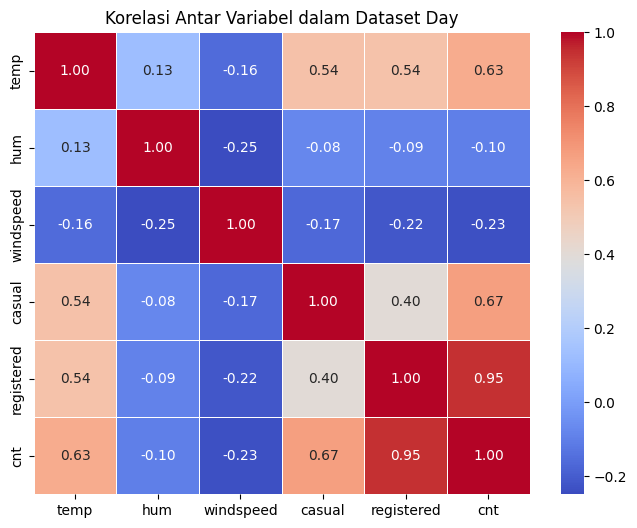

In [20]:
# Menghitung korelasi antar variabel dalam dataset day
correlation_day = day_df[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_day, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Variabel dalam Dataset Day")
plt.show()

<ipython-input-27-666f23a2bc40>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth_name', y='cnt', data=monthly_rentals_day, palette="Set2")


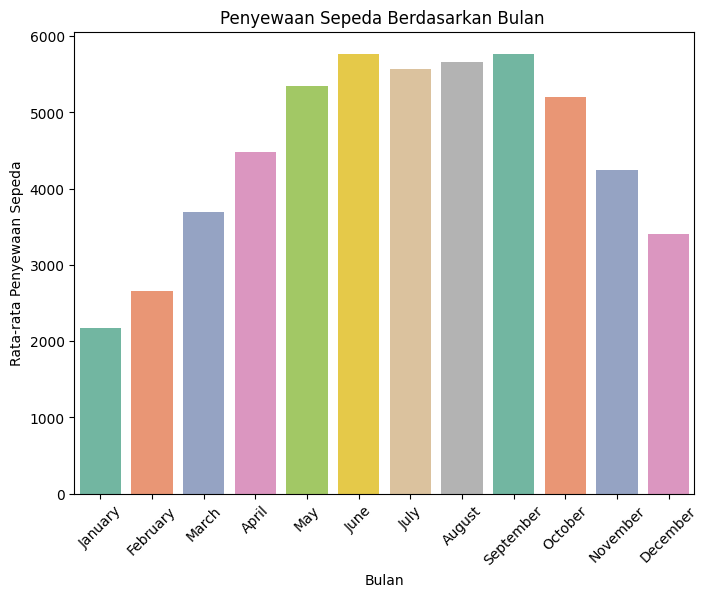

In [27]:
# Menghitung rata-rata penyewaan sepeda berdasarkan bulan (day dataset)
monthly_rentals_day = day_df.groupby('mnth')['cnt'].mean().reset_index()
monthly_rentals_day['mnth_name'] = monthly_rentals_day['mnth'].map(mnth_name)

# Visualisasi rata-rata penyewaan sepeda berdasarkan bulan (day dataset) dengan nama bulan
plt.figure(figsize=(8, 6))
sns.barplot(x='mnth_name', y='cnt', data=monthly_rentals_day, palette="Set2")
plt.title("Penyewaan Sepeda Berdasarkan Bulan ")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.show()

<ipython-input-28-c9c290902343>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=season_effect, palette="Set2")


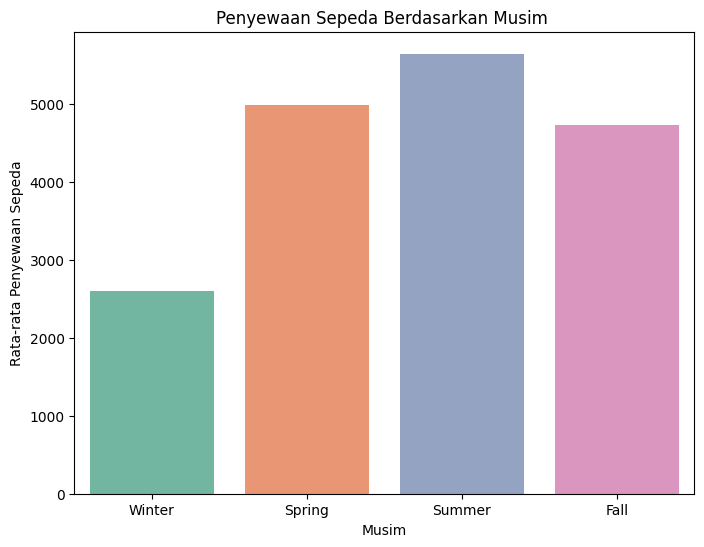

In [28]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
season_effect = day_df.groupby('season')['cnt'].mean().reset_index()
season_map = {
    1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'
}
season_effect['season_name'] = season_effect['season'].map(season_map)

# Visualisasi rata-rata penyewaan sepeda berdasarkan musim dengan nama musim
plt.figure(figsize=(8, 6))
sns.barplot(x='season_name', y='cnt', data=season_effect, palette="Set2")
plt.title("Penyewaan Sepeda Berdasarkan Musim ")
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.show()


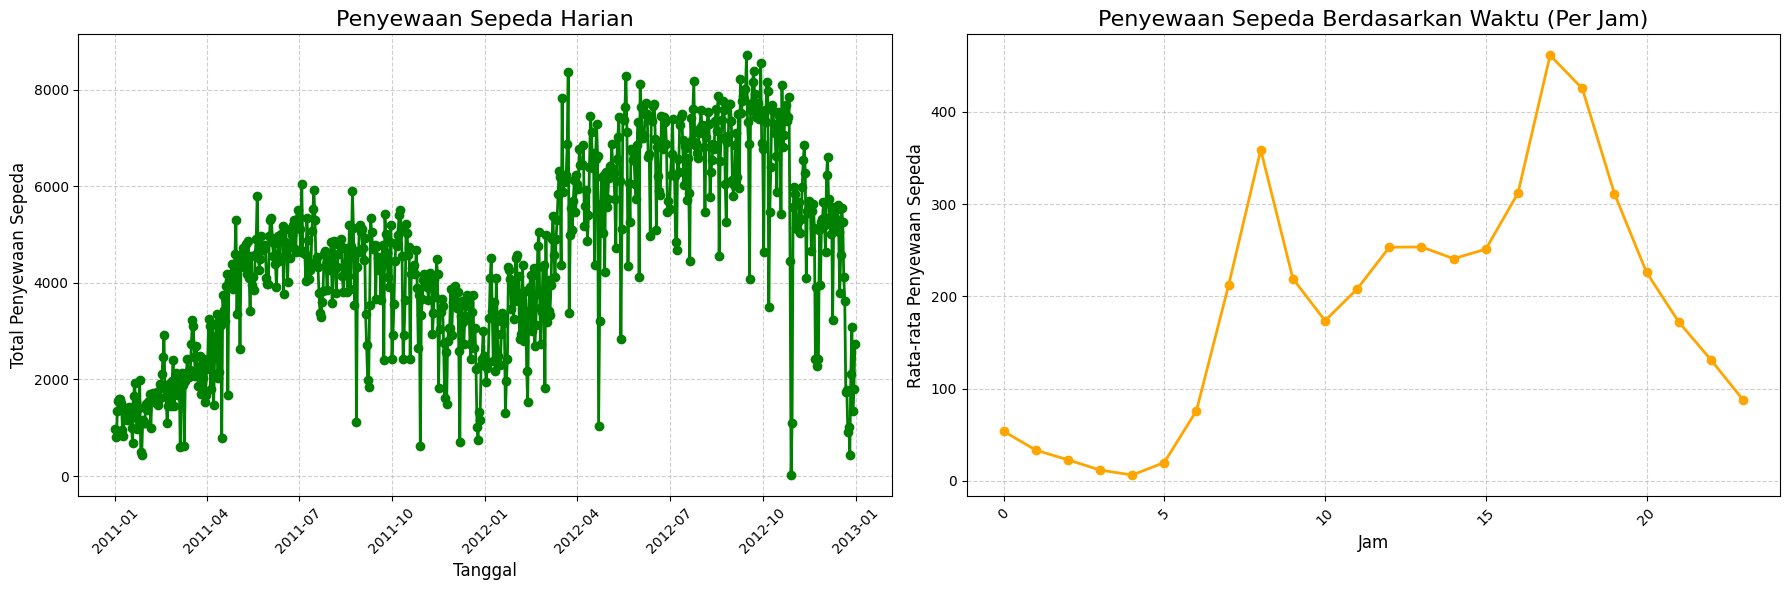


 Tertinggi pada penyewaan sepeda harian: 
8714

 Terendah pada penyewaan sepeda harian: 
22

 Tertinggi pada penyewaan sepeda berdasarkan waktu: 
461.45205479452056

 Terendah pada penyewaan sepeda berdasarkan waktu: 
6.352941176470588


In [26]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Penyewaan Sepeda Harian
daily_rentals = day_df.groupby('dteday')['cnt'].sum()  # Total penyewaan sepeda per hari
axes[0].plot(daily_rentals.index, daily_rentals.values, color='green', marker='o', linewidth=2)
axes[0].set_title("Penyewaan Sepeda Harian", fontsize=16)
axes[0].set_xlabel("Tanggal", fontsize=12)
axes[0].set_ylabel("Total Penyewaan Sepeda", fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].grid(True, linestyle='--', alpha=0.6)
highest_daily = daily_rentals.max()
lowest_daily = daily_rentals.min()

# Penyewaan Sepeda Per Jam
hourly_rentals = hour_df.groupby('hr')['cnt'].mean()  # Rata-rata penyewaan sepeda per jam
axes[1].plot(hourly_rentals.index, hourly_rentals.values, color='orange', marker='o', linewidth=2)
axes[1].set_title("Penyewaan Sepeda Berdasarkan Waktu (Per Jam)", fontsize=16)
axes[1].set_xlabel("Jam", fontsize=12)
axes[1].set_ylabel("Rata-rata Penyewaan Sepeda", fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].grid(True, linestyle='--', alpha=0.6)
highest_hourly = hourly_rentals.max()
lowest_hourly = hourly_rentals.min()


plt.tight_layout()
plt.show()

print("\n Tertinggi pada penyewaan sepeda harian: ")
print(highest_daily)
print("\n Terendah pada penyewaan sepeda harian: ")
print(lowest_daily)
print("\n Tertinggi pada penyewaan sepeda berdasarkan waktu: ")
print(highest_hourly)
print("\n Terendah pada penyewaan sepeda berdasarkan waktu: ")
print(lowest_hourly)

### Pertanyaan 2:

<ipython-input-24-965f5730d0d3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_desc', y='registered', data=hour_df, palette="Set2", ax=axes[0])
<ipython-input-24-965f5730d0d3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather_desc', y='casual', data=hour_df, palette="Set2", ax=axes[1])


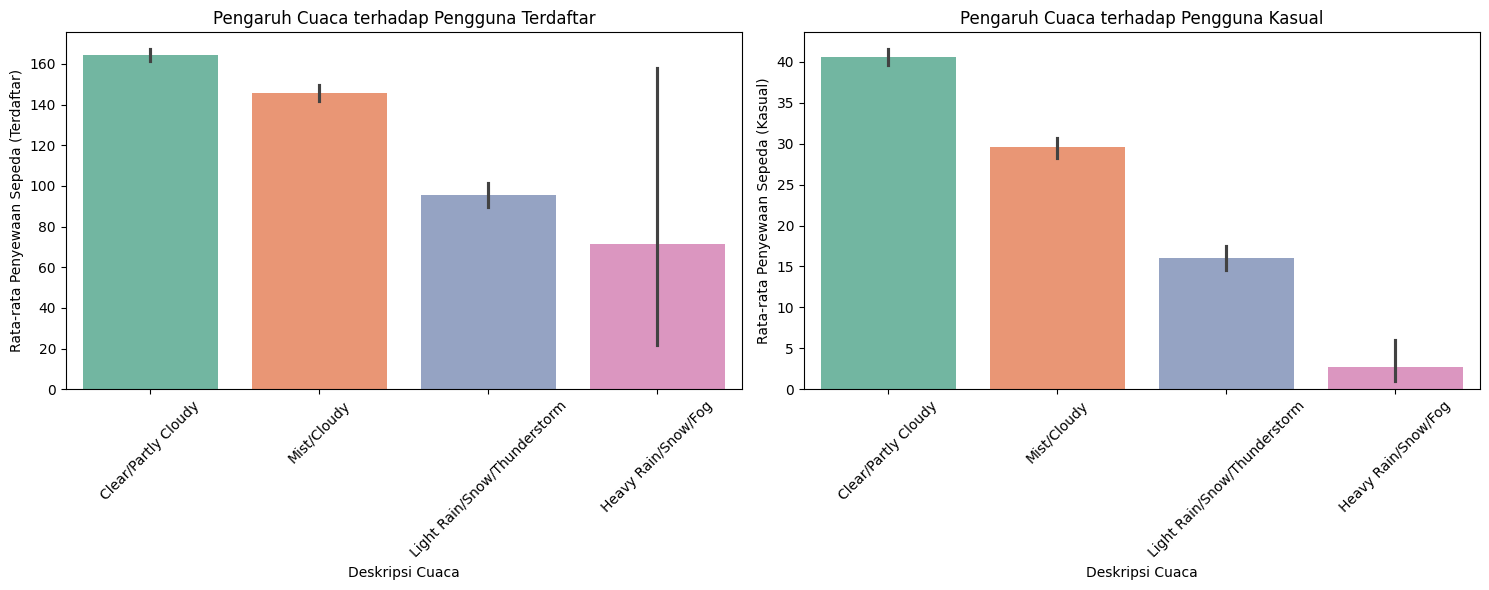

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Visualisasi pengaruh cuaca terhadap penyewaan sepeda oleh pengguna terdaftar
sns.barplot(x='weather_desc', y='registered', data=hour_df, palette="Set2", ax=axes[0])
axes[0].set_title("Pengaruh Cuaca terhadap Pengguna Terdaftar")
axes[0].set_xlabel("Deskripsi Cuaca")
axes[0].set_ylabel("Rata-rata Penyewaan Sepeda (Terdaftar)")
axes[0].tick_params(axis='x', rotation=45)

# Visualisasi pengaruh cuaca terhadap penyewaan sepeda oleh pengguna kasual
sns.barplot(x='weather_desc', y='casual', data=hour_df, palette="Set2", ax=axes[1])
axes[1].set_title("Pengaruh Cuaca terhadap Pengguna Kasual")
axes[1].set_xlabel("Deskripsi Cuaca")
axes[1].set_ylabel("Rata-rata Penyewaan Sepeda (Kasual)")
axes[1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

In [25]:
# Menyimpan dataframe ke file CSV
#day_df.to_csv('cleaned_day_data.csv', index=False)
#hour_df.to_csv('cleaned_hour_data.csv', index=False)

**Insight:**
1. Dari heatmap, terlihat bahwa suhu dan jumlah penyewaan sepeda memiliki korelasi positif yang kuat (0.63), yang mengindikasikan bahwa semakin tinggi suhu, semakin banyak penyewaan sepeda yang terjadi.Pengguna terdaftar juga memiliki korelasi tinggi dengan jumlah penyewaan sepeda (0.95), menunjukkan bahwa pengguna terdaftar menyumbang bagian besar dari total penyewaan sepeda. Kecepatan angin dan kelembapan memiliki korelasi negatif dengan penyewaan sepeda, menunjukkan bahwa cuaca yang lebih buruk dengan angin kencang atau kelembapan tinggi cenderung mengurangi penyewaan sepeda.

2. Visualisasi menunjukkan rata-rata penyewaan sepeda berdasarkan bulan dan musim. Dari grafik ini, kita bisa melihat bahwa penyewaan sepeda lebih tinggi pada bulan-bulan musim semi dan musim panas (seperti Mei hingga Agustus). Sebaliknya, pada bulan-bulan musim dingin, seperti Desember dan Januari, penyewaan cenderung lebih rendah.

3. Boxplot membandingkan distribusi penyewaan sepeda antara pengguna kasual dan pengguna terdaftar berdasarkan kondisi cuaca. Pengguna kasual lebih terpengaruh oleh cuaca buruk, dengan penyewaan yang menurun tajam pada cuaca buruk, sedangkan pengguna terdaftar lebih konsisten dalam penyewaan sepeda mereka meskipun cuaca tidak ideal.

4. Penyewaan sepeda lebih tinggi pada jam-jam sibuk (pagi dan sore), yang mengindikasikan penggunaan sepeda untuk keperluan transportasi.Penyewaan sepeda cenderung menurun tajam setelah jam 9 pagi, dengan penurunan yang lebih besar pada siang hari (antara jam 11-14), sebelum kembali naik pada sore hari.

## Analisis Lanjutan (Opsional)

## Conclusion

Pertanyaan 1:  Berdasarkan analisis yang dilakukan, faktor cuaca seperti suhu memiliki pengaruh yang sangat kuat terhadap pola penyewaan sepeda, dengan korelasi positif yang signifikan (0.63). Semakin tinggi suhu, semakin tinggi jumlah penyewaan sepeda, baik untuk pengguna terdaftar maupun kasual. Kecepatan angin dan kelembaban memiliki korelasi negatif dengan penyewaan sepeda, artinya kecepatan angin yang tinggi dan kelembaban yang besar mengurangi minat orang untuk bersepeda.

Dari segi temporal, penyewaan sepeda lebih tinggi pada bulan-bulan musim panas (Mei hingga Agustus) dan lebih rendah pada bulan-bulan musim dingin (Desember dan Januari). Penyewaan juga lebih banyak terjadi pada pagi dan sore hari, yang menunjukkan bahwa sepeda lebih banyak digunakan untuk keperluan transportasi di jam-jam sibuk.

Cuaca yang lebih hangat dan cerah meningkatkan penyewaan sepeda, sementara suhu dingin dan cuaca buruk mengurangi penyewaan, dengan pengaruh yang lebih besar pada pengguna kasual.


---


**Pertanyaan 2:** Analisis menunjukkan bahwa pengguna terdaftar lebih konsisten dalam menggunakan sepeda, bahkan ketika cuaca buruk. Mereka cenderung menyewa sepeda lebih sering, terlepas dari kondisi cuaca. Sebaliknya, pengguna kasual sangat dipengaruhi oleh kondisi cuaca. Mereka lebih banyak menyewa sepeda pada cuaca cerah (Clear/Partly Cloudy) dan menghindari penyewaan sepeda saat cuaca buruk seperti hujan atau salju (Light Rain/Snow/Thunderstorm dan Heavy Rain/Snow/Fog).

Cuaca memiliki dampak yang lebih besar pada pengguna kasual, yang menunjukkan bahwa strategi pemasaran dapat difokuskan pada mengoptimalkan layanan untuk pengguna kasual pada cuaca cerah dan menawarkan layanan khusus pada cuaca buruk untuk menarik mereka.


---



**saran:**
Untuk meningkatkan penyewaan sepeda, perusahaan dapat fokus pada musim panas dengan menawarkan diskon atau paket spesial untuk menarik lebih banyak penyewa pada bulan-bulan musim panas (Mei - Agustus). Selama musim dingin, perusahaan bisa menyediakan sepeda khusus untuk cuaca dingin atau perlengkapan pelindung untuk pengguna yang tetap ingin bersepeda meskipun cuaca buruk. Pada cuaca cerah, penawaran diskon khusus bisa menarik pengguna kasual yang lebih suka bersepeda saat cuaca baik. Selain itu, perusahaan perlu memastikan ketersediaan sepeda lebih banyak pada jam sibuk seperti pagi dan sore hari, sementara untuk jam siang yang lebih sepi, menawarkan promo khusus bisa meningkatkan penyewaan. Untuk pengguna kasual yang lebih terpengaruh cuaca buruk, memberikan sepeda dengan pelindung hujan atau angin dan akses ke tempat penampungan bisa meningkatkan kenyamanan mereka. Terakhir, dengan memberikan insentif atau hadiah loyalitas pada pengguna terdaftar, perusahaan bisa mendorong mereka untuk tetap menggunakan sepeda meskipun cuaca kurang mendukung. Menggunakan data cuaca real-time dalam aplikasi untuk memberi tahu pengguna apakah bersepeda disarankan atau tidak juga dapat membantu meningkatkan pengalaman dan penyewaan sepeda.